# Install & Import libraries

In [111]:
! pip install --upgrade pip &> /dev/null
! pip install tensorflow &> /dev/null
! pip install -q kaggle &> /dev/null

In [112]:
from google.colab import drive
drive.mount('/gdrive')

##from google.colab import files
#uploaded = files.upload()

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns
from sklearn.metrics import f1_score
from PIL import Image

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load data

## Jooyeong's Path

In [114]:
# Train Data
dir_dt_train = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)

# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)

## Jin's Path

In [115]:
"""# Train Data _Jin's data
dir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'
dir_dt_train = pathlib.Path(dir_dt_train)
# Validation Data(merged to the train data due to the small amount of validation data)
#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'
#dir_dt_val = pathlib.Path(dir_dt_val)

# Test Data
dir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'
dir_dt_test = pathlib.Path(dir_dt_test)"""

"# Train Data _Jin's data\ndir_dt_train = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/train'\ndir_dt_train = pathlib.Path(dir_dt_train)\n# Validation Data(merged to the train data due to the small amount of validation data)\n#dir_dt_val = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/val'\n#dir_dt_val = pathlib.Path(dir_dt_val)\n\n# Test Data\ndir_dt_test = '/gdrive/MyDrive/CXR/chest_xray/chest_xray/test'\ndir_dt_test = pathlib.Path(dir_dt_test)"

In [116]:
"""# Train Data
dir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'
dir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'
dir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)
dir_dt_train_normal = pathlib.Path(dir_dt_train_normal)

dt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))
dt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))

img_cnt_train_pneumonia = len(dt_train_pneumonia)
img_cnt_train_normal = len(dt_train_normal)

print('Training Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))


# Validation Data
dir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'
dir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'
dir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)
dir_dt_val_normal = pathlib.Path(dir_dt_val_normal)

dt_val_pneumonia = list(dir_dt_val_pneumonia.glob('*.jpeg'))
dt_val_normal = list(dir_dt_val_normal.glob('*.jpeg'))

img_cnt_val_pneumonia = len(dt_val_pneumonia)
img_cnt_val_normal = len(dt_val_normal)

print('Validation Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_val_pneumonia), len(dt_val_normal)))


# Test Data
dir_dt_test_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/PNEUMONIA'
dir_dt_test_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/test/NORMAL'
dir_dt_test_pneumonia = pathlib.Path(dir_dt_test_pneumonia)
dir_dt_test_normal = pathlib.Path(dir_dt_test_normal)

dt_test_pneumonia = list(dir_dt_test_pneumonia.glob('*.jpeg'))
dt_test_normal = list(dir_dt_test_normal.glob('*.jpeg'))

img_cnt_test_pneumonia = len(dt_test_pneumonia)
img_cnt_test_normal = len(dt_test_normal)

print('Test Data')
print('Pneumonia: {} Normal: {}'.format(len(dt_test_pneumonia), len(dt_test_normal)))"""

"# Train Data\ndir_dt_train_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/PNEUMONIA'\ndir_dt_train_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/train/NORMAL'\ndir_dt_train_pneumonia = pathlib.Path(dir_dt_train_pneumonia)\ndir_dt_train_normal = pathlib.Path(dir_dt_train_normal)\n\ndt_train_pneumonia = list(dir_dt_train_pneumonia.glob('*.jpeg'))\ndt_train_normal = list(dir_dt_train_normal.glob('*.jpeg'))\n\nimg_cnt_train_pneumonia = len(dt_train_pneumonia)\nimg_cnt_train_normal = len(dt_train_normal)\n\nprint('Training Data')\nprint('Pneumonia: {} Normal: {}'.format(len(dt_train_pneumonia), len(dt_train_normal)))\n\n\n# Validation Data\ndir_dt_val_pneumonia = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/PNEUMONIA'\ndir_dt_val_normal = '/gdrive/MyDrive/Data Science/Datasets/chest_xray/val/NORMAL'\ndir_dt_val_pneumonia = pathlib.Path(dir_dt_val_pneumonia)\ndir_dt_val_normal = pathlib.Path(dir_dt_val_normal)\n\ndt_val_pneumonia = list(dir_dt_val_

In [117]:
# Size of each image
"""for f in dir_dt_train.glob("PNEUMONIA/*.jpeg"):
  img = Image.open(f)
  print(img.size)"""

'for f in dir_dt_train.glob("PNEUMONIA/*.jpeg"):\n  img = Image.open(f)\n  print(img.size)'

# Create a dataset

## Define parameters

In [118]:
#batch_size = 32   # Number of Images in each batch
batch_size = 20   # Number of Images in each batch
img_height = 180  # Size of Height for Resizing
img_width = 180   # Size of Width for Resizing

## Data Preprocessing

### Reference
**tf.keras.preprocessing.image_dataset_from_directory**
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

### Original Data

In [119]:
"""dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='training'
)"""

"dt_train = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_train,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123,\n    validation_split=.2,\n    subset='training'\n)"

In [120]:
"""dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=.2,
    subset='validation'
  )"""

"dt_val = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_train,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123,\n    validation_split=.2,\n    subset='validation'\n  )"

In [121]:
"""dt_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123
  )"""

"dt_test = tf.keras.preprocessing.image_dataset_from_directory(\n    directory=dir_dt_test,\n    labels='inferred',\n    label_mode='int',\n    class_names=None,\n    color_mode='grayscale', # Option: rgb\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n    seed=123\n  )"

### Subset of Original Data
#### Train: 400 of 500 images(80%)
#### Validation: 100 of 500 images(20%)
#### Test: 624 images

In [122]:
dt_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split= 1-(400/5232),
    subset='training')

Found 5232 files belonging to 2 classes.
Using 400 files for training.


In [123]:
dt_val = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_train,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=100/5232,
    subset='validation')

Found 5232 files belonging to 2 classes.
Using 100 files for validation.


In [124]:
dt_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory=dir_dt_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale', # Option: rgb
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123)

Found 624 files belonging to 2 classes.


In [125]:
num_class = len(dt_train.class_names)

# Visualize the data

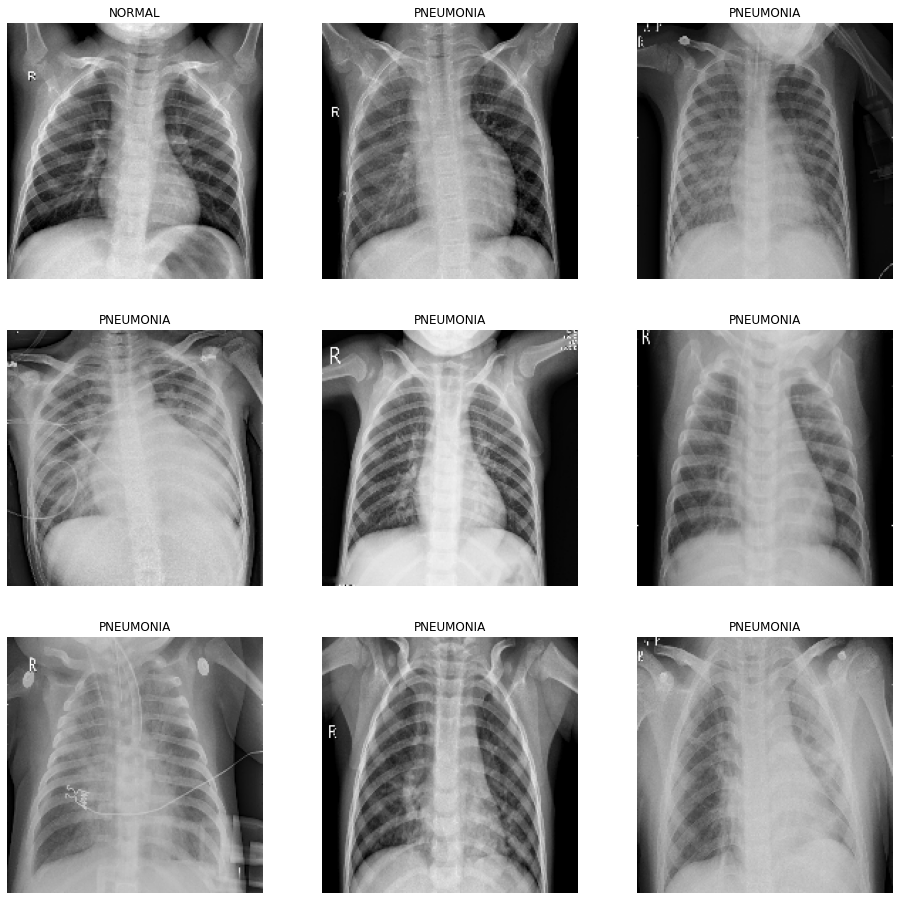

In [126]:
plt.figure(figsize=(16, 16))

for images, labels in dt_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

## Check Data Structure

### Reference
**tf.data.Dataset**

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [127]:
for image_batch, labels_batch in dt_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 180, 180, 1)
(20,)


In [128]:
for image_batch, labels_batch in dt_test:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 180, 180, 1)
(20,)


## Examples of Data Augmentation

### RandomFlip

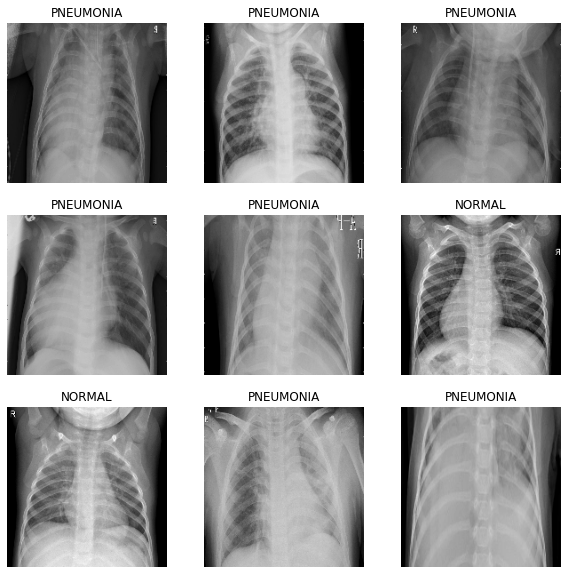

In [129]:
dt_augm_filp = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal")
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_filp(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomRotation

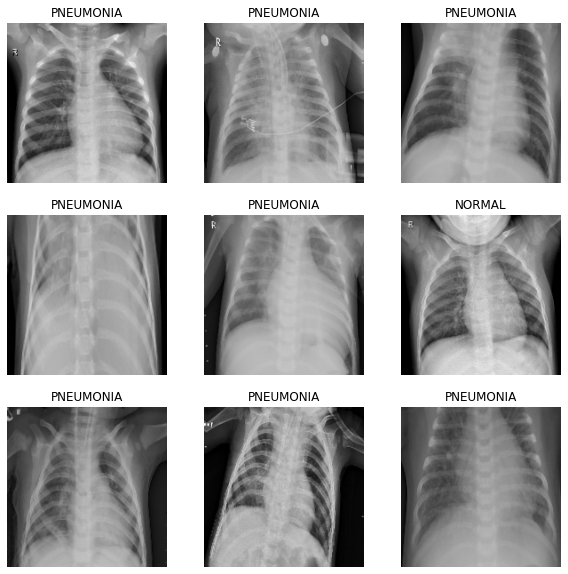

In [130]:
dt_augm_rotation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.01)
])

plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_rotation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

### RandomZoom

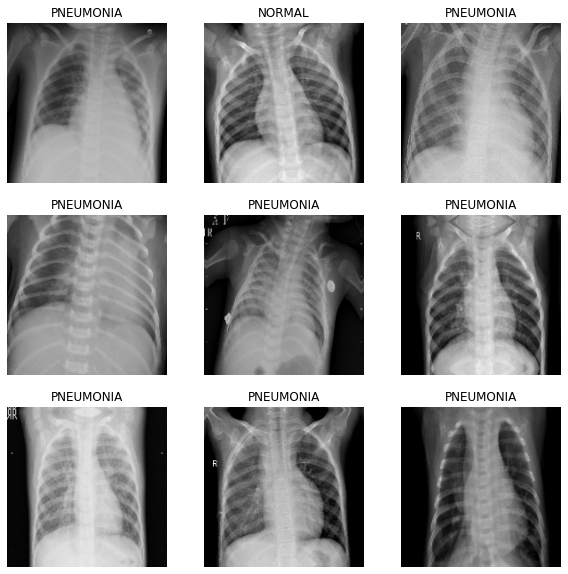

In [131]:
dt_augm_zoom = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(0.1)
])


plt.figure(figsize=(10, 10))

for images, labels in dt_train.take(1):
  for i in range(9):
    augmented_images = dt_augm_zoom(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_images[i].numpy().astype("uint8")), cmap='gray', vmin=0, vmax=255)
    plt.title(dt_train.class_names[labels[i]])
    plt.axis("off")

# Configure the dataset for the better performance

In [132]:
AUTOTUNE = tf.data.AUTOTUNE

dt_train = dt_train.cache().prefetch(buffer_size=AUTOTUNE)
dt_val = dt_val.cache().prefetch(buffer_size=AUTOTUNE)


'''
Color RGB ranges from 0 to 255. For the better fit to a neural network,
standardize the range from 0 to 1.
'''
"""# Before normalizing layer
image_batch, labels_batch = next(iter(dt_train))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

normalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) 
normalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))

# After nomarlizing layer
image_batch, labels_batch = next(iter(normalized_dt))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))"""

'# Before normalizing layer\nimage_batch, labels_batch = next(iter(dt_train))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))\n\nnormalized_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) \nnormalized_dt = dt_train.map(lambda x, y: (normalized_layer(x), y))\n\n# After nomarlizing layer\nimage_batch, labels_batch = next(iter(normalized_dt))\nfirst_image = image_batch[0]\nprint(np.min(first_image), np.max(first_image))'

# Experimental Designs

## Define a function to build a model



1.   Non-Contrastive Learning
2.   Contrastive Learning

No Dropout & Data Augmentation (RandomFlip, RandomRotation, RandomZoom)

In [133]:
def build_model(dt_train, dt_augms):

  model = Sequential()
  
  # It is also possible to normalize layer in the building block of the model                   
  #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # The first convolutional layer can typically have a large kernel, usually with a stride of 2
  #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB
  if dt_augms == []:
    print('Non-Contrastive Learning')
    model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu', input_shape=(img_height, img_width, 1)))
  else:
    print('Contrastive Learning')
    if dt_augms == {'randomflip'}:
      print('RandomFlip')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomrotation'}:
      print('RandomRotation')
      model.add(layers.experimental.preprocessing.RandomRotation(0.01, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomzoom'}:
      print('RandomZoom')
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomrotation'}:
      print('RandomFlip & RandomRotation')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomRotation(0.01, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomzoom'}:
      print('RandomFlip & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomrotation', 'randomzoom'}:
      print('RandomRotation & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomRotation(0.01, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))
    elif dt_augms == {'randomflip', 'randomrotation', 'randomzoom'}:
      print('RandomFlip & RandomRotation & RandomZoom')
      model.add(layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomRotation(0.01, input_shape=(img_height, img_width, 1)))
      model.add(layers.experimental.preprocessing.RandomZoom(0.1, input_shape=(img_height, img_width, 1)))

    model.add(layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'))
       
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_class, activation='softmax'))

  # Compile the model
  model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  
  return model

## Convolutional Neural Network(CNN): Supervised Learning Approach 

##### Build Model

In [134]:
dt_augms = []
model_cnn_non_contrastive = build_model(dt_train, dt_augms)
model_cnn_non_contrastive.summary()

Non-Contrastive Learning
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_83 (Conv2D)          

##### Train Model

In [135]:
epochs=10

history = model_cnn_non_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 3s 107ms/step - loss: 4.4932 - accuracy: 0.5864 - val_loss: 0.5520 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5010 - accuracy: 0.7858 - val_loss: 0.5301 - val_accuracy: 0.7600
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3955 - accuracy: 0.8123 - val_loss: 0.4662 - val_accuracy: 0.7300
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2968 - accuracy: 0.8434 - val_loss: 0.3541 - val_accuracy: 0.8300
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1916 - accuracy: 0.9062 - val_loss: 0.3285 - val_accuracy: 0.9100
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0897 - accuracy: 0.9649 - val_loss: 0.5360 - val_accuracy: 0.8300
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0884 - accuracy: 0.9648 - val_loss: 0.2799 - val_accuracy: 0.9300
Epoch 8/10
20/20 [

##### Plot Evaluation

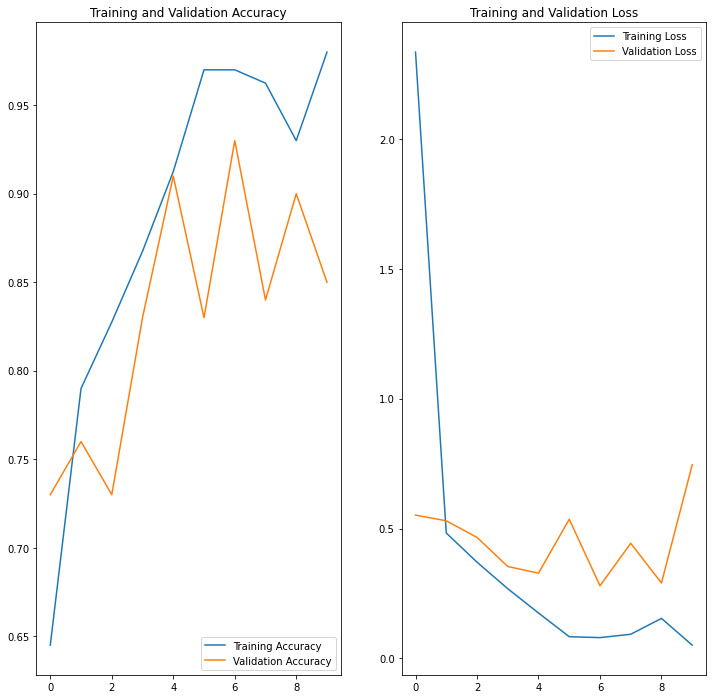

In [136]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [137]:
model_cnn_non_contrastive.evaluate(dt_test, batch_size=batch_size)

32/32 [==============================] - 3s 70ms/step - loss: 2.2583 - accuracy: 0.7067


[2.2582621574401855, 0.7067307829856873]

## Convolutional Neural Network(CNN): Contrastive Learning Approach 

### 1.Apply one augmentation:

#### 1-1 RandomFlip

##### Build Model

In [138]:
dt_augms = {'randomflip'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_11 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_87 (Max

##### Train Model

In [139]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 4.9079 - accuracy: 0.5870 - val_loss: 0.5767 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5375 - accuracy: 0.7803 - val_loss: 0.4604 - val_accuracy: 0.7900
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4136 - accuracy: 0.8202 - val_loss: 0.6237 - val_accuracy: 0.7300
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3258 - accuracy: 0.8521 - val_loss: 0.2626 - val_accuracy: 0.9100
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1805 - accuracy: 0.9274 - val_loss: 0.1504 - val_accuracy: 0.9400
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1385 - accuracy: 0.9448 - val_loss: 0.4142 - val_accuracy: 0.8000
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2424 - accuracy: 0.9186 - val_loss: 0.1729 - val_accuracy: 0.9200
Epoch 8/10
20/20 [=

##### Plot Evaluation

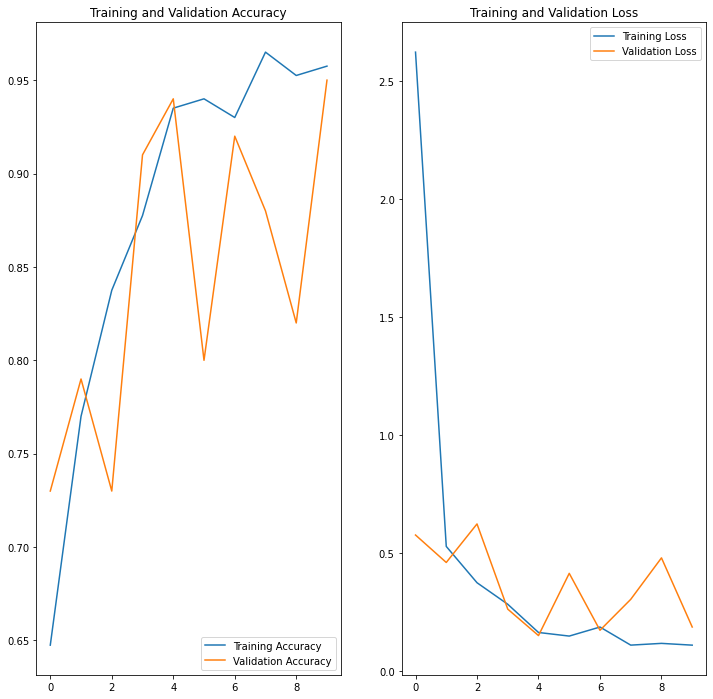

In [140]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
#131/131 [==============================] - 1s 8ms/step - loss: 0.0498 - accuracy: 0.9803 - val_loss: 0.0435 - val_accuracy: 0.9837

##### Test Model

In [141]:
model_cnn_contrastive.evaluate(dt_test, batch_size=batch_size)

32/32 [==============================] - 3s 71ms/step - loss: 1.0168 - accuracy: 0.7676


[1.016757607460022, 0.7676281929016113]

#### 1-2 RandomRotation

##### Build Model

In [142]:
dt_augms = {'randomrotation'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomRotation
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_11 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_92 

##### Train Model

In [143]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 2.9509 - accuracy: 0.6415 - val_loss: 0.6731 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5834 - accuracy: 0.7888 - val_loss: 0.6191 - val_accuracy: 0.8700
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5257 - accuracy: 0.8043 - val_loss: 0.6981 - val_accuracy: 0.7300
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4131 - accuracy: 0.8567 - val_loss: 0.5928 - val_accuracy: 0.7600
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2742 - accuracy: 0.8943 - val_loss: 0.3360 - val_accuracy: 0.9100
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1869 - accuracy: 0.9349 - val_loss: 0.2208 - val_accuracy: 0.9300
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1663 - accuracy: 0.9544 - val_loss: 0.1625 - val_accuracy: 0.9200
Epoch 8/10
20/20 [=

##### Plot Evaluation

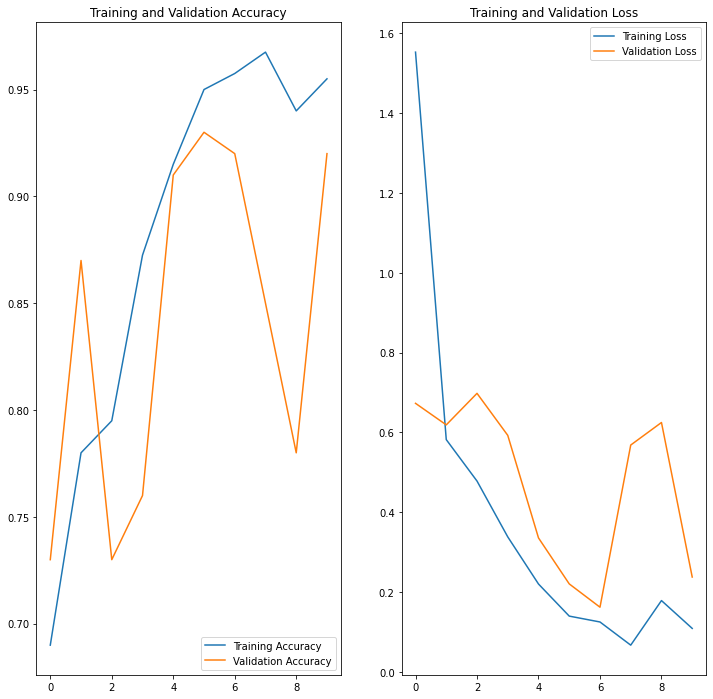

In [144]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [145]:
model_cnn_contrastive.evaluate(dt_test, batch_size=batch_size)

32/32 [==============================] - 3s 72ms/step - loss: 1.1000 - accuracy: 0.7628


[1.0999891757965088, 0.7628205418586731]

#### 1-3 RandomZoom 

##### Build Model

In [146]:
dt_augms = {'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomZoom
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_zoom_11 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_97 (Max

##### Train Model

In [147]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 3.7085 - accuracy: 0.6357 - val_loss: 0.7743 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5630 - accuracy: 0.8050 - val_loss: 0.4872 - val_accuracy: 0.8200
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4307 - accuracy: 0.7924 - val_loss: 0.6979 - val_accuracy: 0.7500
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4879 - accuracy: 0.8296 - val_loss: 0.4992 - val_accuracy: 0.7700
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3732 - accuracy: 0.8273 - val_loss: 0.4861 - val_accuracy: 0.7500
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3558 - accuracy: 0.8596 - val_loss: 0.5309 - val_accuracy: 0.8000
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3321 - accuracy: 0.8769 - val_loss: 0.4170 - val_accuracy: 0.8400
Epoch 8/10
20/20 [=

##### Plot Evaluation

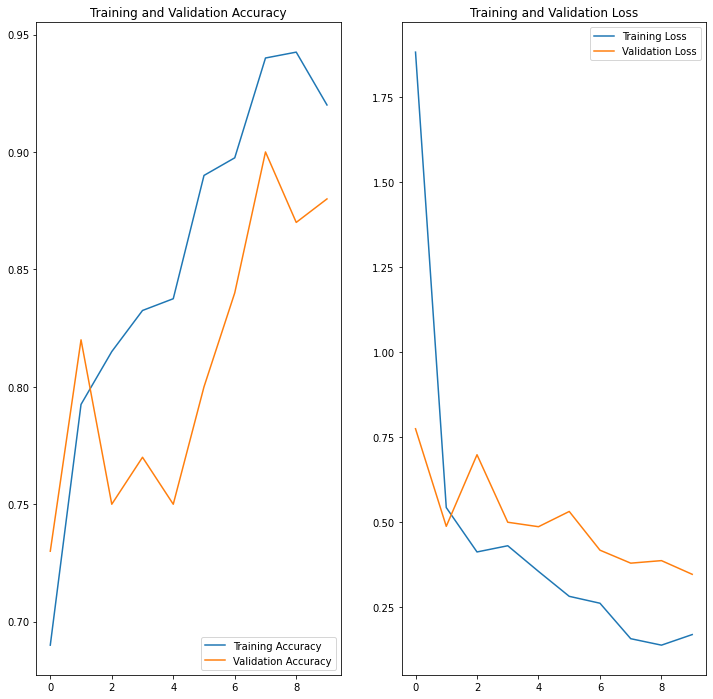

In [148]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model


In [149]:
model_cnn_contrastive.evaluate(dt_test, batch_size=batch_size)

32/32 [==============================] - 3s 71ms/step - loss: 1.0104 - accuracy: 0.6827


[1.0103816986083984, 0.682692289352417]

### 2.Apply two augmentations

#### 2-1 RandomFlip & RandomRotation

##### Build Model

In [150]:
dt_augms = {'randomflip', 'randomrotation'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomRotation
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_12 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_12 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv

##### Train Model

In [151]:
epochs=10

history = model_cnn_contrastive.fit(
    x= dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 5.7138 - accuracy: 0.6106 - val_loss: 0.6721 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5025 - accuracy: 0.8126 - val_loss: 0.6180 - val_accuracy: 0.7400
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.3810 - accuracy: 0.8217 - val_loss: 0.5968 - val_accuracy: 0.7600
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2615 - accuracy: 0.8899 - val_loss: 0.2338 - val_accuracy: 0.9200
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2710 - accuracy: 0.9111 - val_loss: 0.2584 - val_accuracy: 0.8400
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1784 - accuracy: 0.9245 - val_loss: 0.1439 - val_accuracy: 0.9600
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0921 - accuracy: 0.9691 - val_loss: 0.5823 - val_accuracy: 0.8400
Epoch 8/10
20/20 [=

##### Plot Evaluation

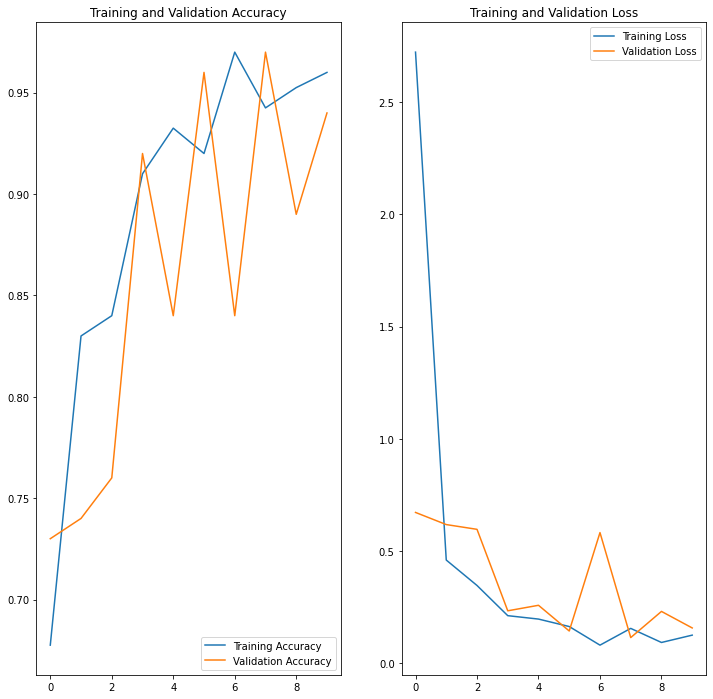

In [152]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [153]:
model_cnn_contrastive.evaluate(dt_test, batch_size=batch_size)

32/32 [==============================] - 3s 72ms/step - loss: 0.9793 - accuracy: 0.7756


[0.979307234287262, 0.7756410241127014]

#### 2-2 RandomFlip & RandomZoom

##### Build Model

In [154]:
dt_augms = {'randomflip', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomZoom
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_13 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_12 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_105 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_1

##### Train Model

In [155]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 8.3180 - accuracy: 0.6649 - val_loss: 0.9005 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5678 - accuracy: 0.7648 - val_loss: 0.6074 - val_accuracy: 0.7300
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4599 - accuracy: 0.8216 - val_loss: 0.4250 - val_accuracy: 0.7800
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2509 - accuracy: 0.8999 - val_loss: 0.3989 - val_accuracy: 0.8600
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2907 - accuracy: 0.8842 - val_loss: 0.2712 - val_accuracy: 0.8800
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2029 - accuracy: 0.9133 - val_loss: 0.2978 - val_accuracy: 0.8800
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2047 - accuracy: 0.9146 - val_loss: 0.6033 - val_accuracy: 0.7900
Epoch 8/10
20/20 [=

##### Plot Evaluation

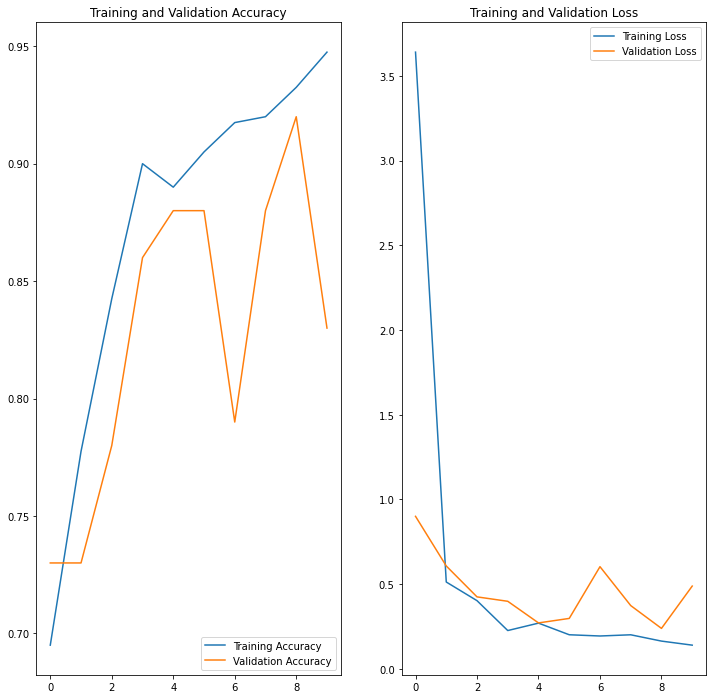

In [156]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [157]:
model_cnn_contrastive.evaluate(dt_test, batch_size=batch_size)

32/32 [==============================] - 3s 72ms/step - loss: 1.4592 - accuracy: 0.6506


[1.4591758251190186, 0.6506410241127014]

#### 2-3 RandomRotation & RotationZoom

##### Build Model

In [158]:
dt_augms = {'randomrotation', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomRotation & RandomZoom
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_13 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_13 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv

##### Train Model

In [159]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 2.5259 - accuracy: 0.6388 - val_loss: 0.6876 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5681 - accuracy: 0.7804 - val_loss: 0.6234 - val_accuracy: 0.8400
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5593 - accuracy: 0.7718 - val_loss: 0.7647 - val_accuracy: 0.7400
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4572 - accuracy: 0.8063 - val_loss: 0.4884 - val_accuracy: 0.8000
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.2673 - accuracy: 0.8766 - val_loss: 0.4494 - val_accuracy: 0.8500
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.2036 - accuracy: 0.9196 - val_loss: 0.6159 - val_accuracy: 0.8700
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.2749 - accuracy: 0.9103 - val_loss: 0.3490 - val_accuracy: 0.8900
Epoch 8/10
20/20 [=

##### Plot Evaluation

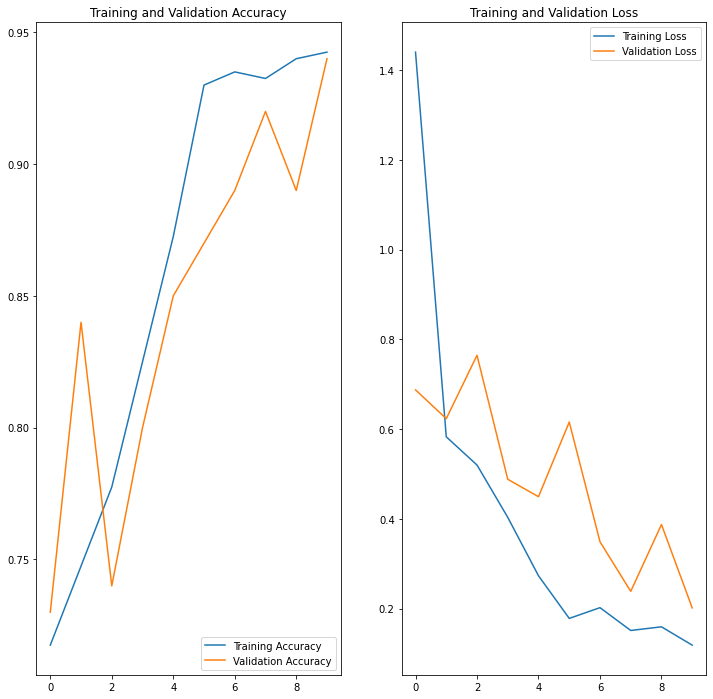

In [160]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [161]:
model_cnn_contrastive.evaluate(dt_test, batch_size=batch_size)

32/32 [==============================] - 3s 75ms/step - loss: 0.8235 - accuracy: 0.7853


[0.823538064956665, 0.7852563858032227]

### 3.Apply all three augmentations

#### 3-1 RandomFlip, RandomRotation & RandomZoom

##### Build Model

In [162]:
dt_augms = {'randomflip', 'randomrotation', 'randomzoom'}
model_cnn_contrastive = build_model(dt_train, dt_augms)
model_cnn_contrastive.summary()

Contrastive Learning
RandomFlip & RandomRotation & RandomZoom
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_14 (RandomFlip)  (None, 180, 180, 1)       0         
_________________________________________________________________
random_rotation_14 (RandomRo (None, 180, 180, 1)       0         
_________________________________________________________________
random_zoom_14 (RandomZoom)  (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 45, 45, 32)        4640      
_________________________________________________________

##### Train Model

In [163]:
epochs=10

history = model_cnn_contrastive.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
20/20 [==============================] - 1s 15ms/step - loss: 3.8036 - accuracy: 0.6345 - val_loss: 0.5960 - val_accuracy: 0.7300
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5068 - accuracy: 0.7871 - val_loss: 0.5243 - val_accuracy: 0.7300
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4567 - accuracy: 0.8122 - val_loss: 0.6708 - val_accuracy: 0.7500
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.3699 - accuracy: 0.8462 - val_loss: 0.2838 - val_accuracy: 0.9300
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.3145 - accuracy: 0.8891 - val_loss: 0.1982 - val_accuracy: 0.9200
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.2094 - accuracy: 0.9270 - val_loss: 0.1850 - val_accuracy: 0.9400
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.1838 - accuracy: 0.9307 - val_loss: 0.4250 - val_accuracy: 0.8100
Epoch 8/10
20/20 [=

##### Plot Evaluation

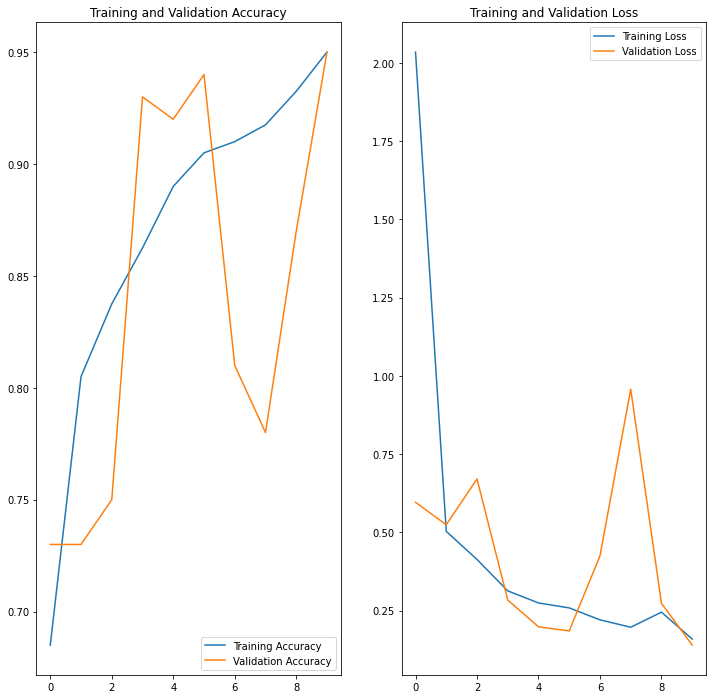

In [164]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Test Model

In [165]:
model_cnn_contrastive.evaluate(dt_test, batch_size=batch_size)

32/32 [==============================] - 3s 73ms/step - loss: 0.9478 - accuracy: 0.7179


[0.94781494140625, 0.7179487347602844]

## Define a function to build a model (with Dropout)

### Dropout & Data Augmentation with best performance (Random Rotation)

### 1.Apply one augmentation and Dropout

#### 1-1 RandomRotation & Dropout

In [ ]:
def build_model_dropout_randomrotation(dt_train):
  
  model = Sequential([
    # It is also possible to normalize layer in the building block of the model                   
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    # The first convolutional layer can typically have a large kernel, usually with a stride of 2
    #layers.Conv2D(filters=16, kernel_size=5, strides=(2,), padding='same', activation='relu', input_shape=(img_height, img_width, 3)), # RGB

    layers.experimental.preprocessing.RandomRotation(0.1, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(.5), # To reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(.5),
    layers.Dense(num_class, activation='softmax')])

  # Compile the model
  model.compile(
      optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
  
  return model

##### Build a model

In [ ]:
model_cnn = build_model_dropout_randomrotation(dt_train)
model_cnn.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_rotation_5 (RandomRot (None, 180, 180, 1)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 90, 90, 16)        416       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 45, 45, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 11, 11, 64)      

##### Train the model

In [ ]:
epochs=10

model_cnn = model_cnn.fit(
    x=dt_train,
    validation_data=dt_val,
    epochs=epochs)

Epoch 1/10
131/131 [==============================] - 2s 11ms/step - loss: 1.1278 - accuracy: 0.6771 - val_loss: 0.6341 - val_accuracy: 0.8212
Epoch 2/10
131/131 [==============================] - 1s 9ms/step - loss: 0.5058 - accuracy: 0.7609 - val_loss: 0.3108 - val_accuracy: 0.8461
Epoch 3/10
131/131 [==============================] - 1s 9ms/step - loss: 0.3080 - accuracy: 0.8479 - val_loss: 0.1526 - val_accuracy: 0.9331
Epoch 4/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2350 - accuracy: 0.9067 - val_loss: 0.1248 - val_accuracy: 0.9503
Epoch 5/10
131/131 [==============================] - 1s 9ms/step - loss: 0.2536 - accuracy: 0.8990 - val_loss: 0.1633 - val_accuracy: 0.9379
Epoch 6/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1931 - accuracy: 0.9311 - val_loss: 0.1072 - val_accuracy: 0.9551
Epoch 7/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1476 - accuracy: 0.9454 - val_loss: 0.1152 - val_accuracy: 0.9465
Epoch

Epoch 10/10
131/131 [==============================] - 1s 9ms/step - loss: 0.1487 - accuracy: 0.9460 - val_loss: 0.0895 - val_accuracy: 0.9637

##### Plot the evaluation

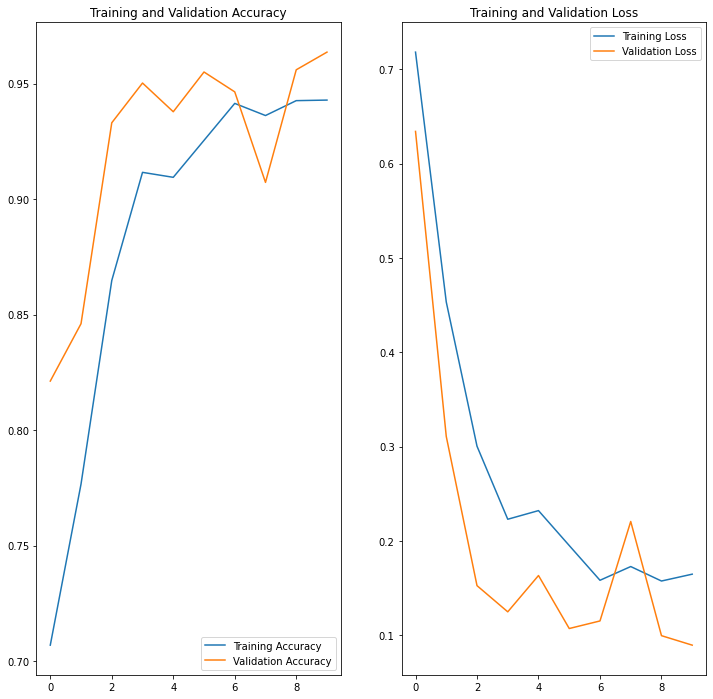

In [ ]:
acc = model_cnn.history['accuracy']
val_acc = model_cnn.history['val_accuracy']

loss = model_cnn.history['loss']
val_loss = model_cnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()